<a href="https://colab.research.google.com/github/mona-gomaa/Ai_computer_vision/blob/computer_vision/Human_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import cv2
import numpy as np

In [185]:
import os

data_path= r'D:\\CK+48'

# Check if the directory exists, and if not, create it
if not os.path.exists(data_path):
    os.makedirs(data_path)
    print(f"Directory '{data_path}' has been created.")
else:
    print(f"Directory '{data_path}' already exists.")
data_path

Directory 'D:\\CK+48' already exists.


'D:\\\\CK+48'

In [186]:
for dataset in os.listdir(data_path):
    dataset_path = os.path.join(data_path, dataset)
    img_data=[]

    if os.path.isdir(dataset_path):
        img_list = os.listdir(dataset_path)
        print(f"Contents of folder '{dataset}': {img_list}")
        for img in img_list:
            input_img = cv2.imread(data_path+'/'+ dataset +'/'+img)
            input_img_resized = cv2.resize (input_img,(48,48))
            img_data.append(input_img_resized)

Contents of folder 'contempt': ['S160_006_00000008.png', 'S148_002_00000013.png', 'S895_002_00000005.png', 'S151_002_00000027.png', 'S157_002_00000010.png', 'S895_002_00000006.png', 'S157_002_00000009.png', 'S503_002_00000007.png', 'S502_002_00000009.png', 'S147_002_00000012.png', 'S160_006_00000009.png', 'S502_002_00000008.png', 'S158_002_00000009.png', 'S156_002_00000021.png', 'S149_002_00000011.png', 'S151_002_00000029.png', 'S506_002_00000008.png', 'S156_002_00000020.png', 'S149_002_00000013.png', 'S156_002_00000019.png', 'S504_002_00000008.png', 'S148_002_00000014.png', 'S155_002_00000011.png', 'S139_002_00000012.png', 'S151_002_00000028.png', 'S504_002_00000007.png', 'S139_002_00000011.png', 'S505_002_00000019.png', 'S157_002_00000011.png', 'S160_006_00000010.png', 'S505_002_00000021.png', 'S147_002_00000013.png', 'S147_002_00000011.png', 'S895_002_00000007.png', 'S154_002_00000012.png', 'S503_002_00000006.png', 'S506_002_00000009.png', 'S504_002_00000009.png', 'S154_002_00000011

In [187]:
data_list

['contempt',
 'surprise',
 'fear',
 'anger',
 'disgust',
 'sadness',
 'happy',
 '.ipynb_checkpoints']

In [188]:
img_data = []

# List the contents of each folder in the 'data_path'
for dataset in os.listdir(data_path):
    dataset_path = os.path.join(data_path, dataset)

    if os.path.isdir(dataset_path):
        img_list = os.listdir(dataset_path)

        for img in img_list:
            input_img = cv2.imread(os.path.join(dataset_path, img))
            input_img_resized = cv2.resize(input_img, (48, 48))
            img_data.append(input_img_resized)

df = np.array(img_data)
df = df.astype('float32')
df = df / 255.0
df.shape

(981, 48, 48, 3)

In [189]:
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical  # Import to_categorical for one-hot encoding
from sklearn.model_selection import train_test_split


#preparing data

In [190]:
num_class= len(data_list)
num_sample= df.shape[0]
num_sample

981

In [191]:
#one hot vector
labels = np.ones((num_sample,), dtype='int64')

In [192]:
labels[0:134] = 0 # 135 angry
labels[135:189] = 1 # 54 contempt
labels[189:366] = 2 # 177 disgust
labels[366:441]= 3 # 75 fear
labels[441:648] = 4 # 207  happy
labels[648:732] = 5 # 84 sadness
labels[732:981] = 6 # 249 surprise

In [193]:
len(labels[0:134])

134

In [194]:
names = data_list
img_labels = to_categorical(labels,num_class)

In [195]:
img_labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [196]:
# sufffle
x_img, y_img = shuffle(df,img_labels,random_state=10)

#train_test_split

In [197]:
x_train,x_test,y_train,y_test=train_test_split(x_img,y_img,test_size=0.2,random_state=42)

In [198]:
x_train.shape

(784, 48, 48, 3)

In [199]:
x_test.shape

(197, 48, 48, 3)

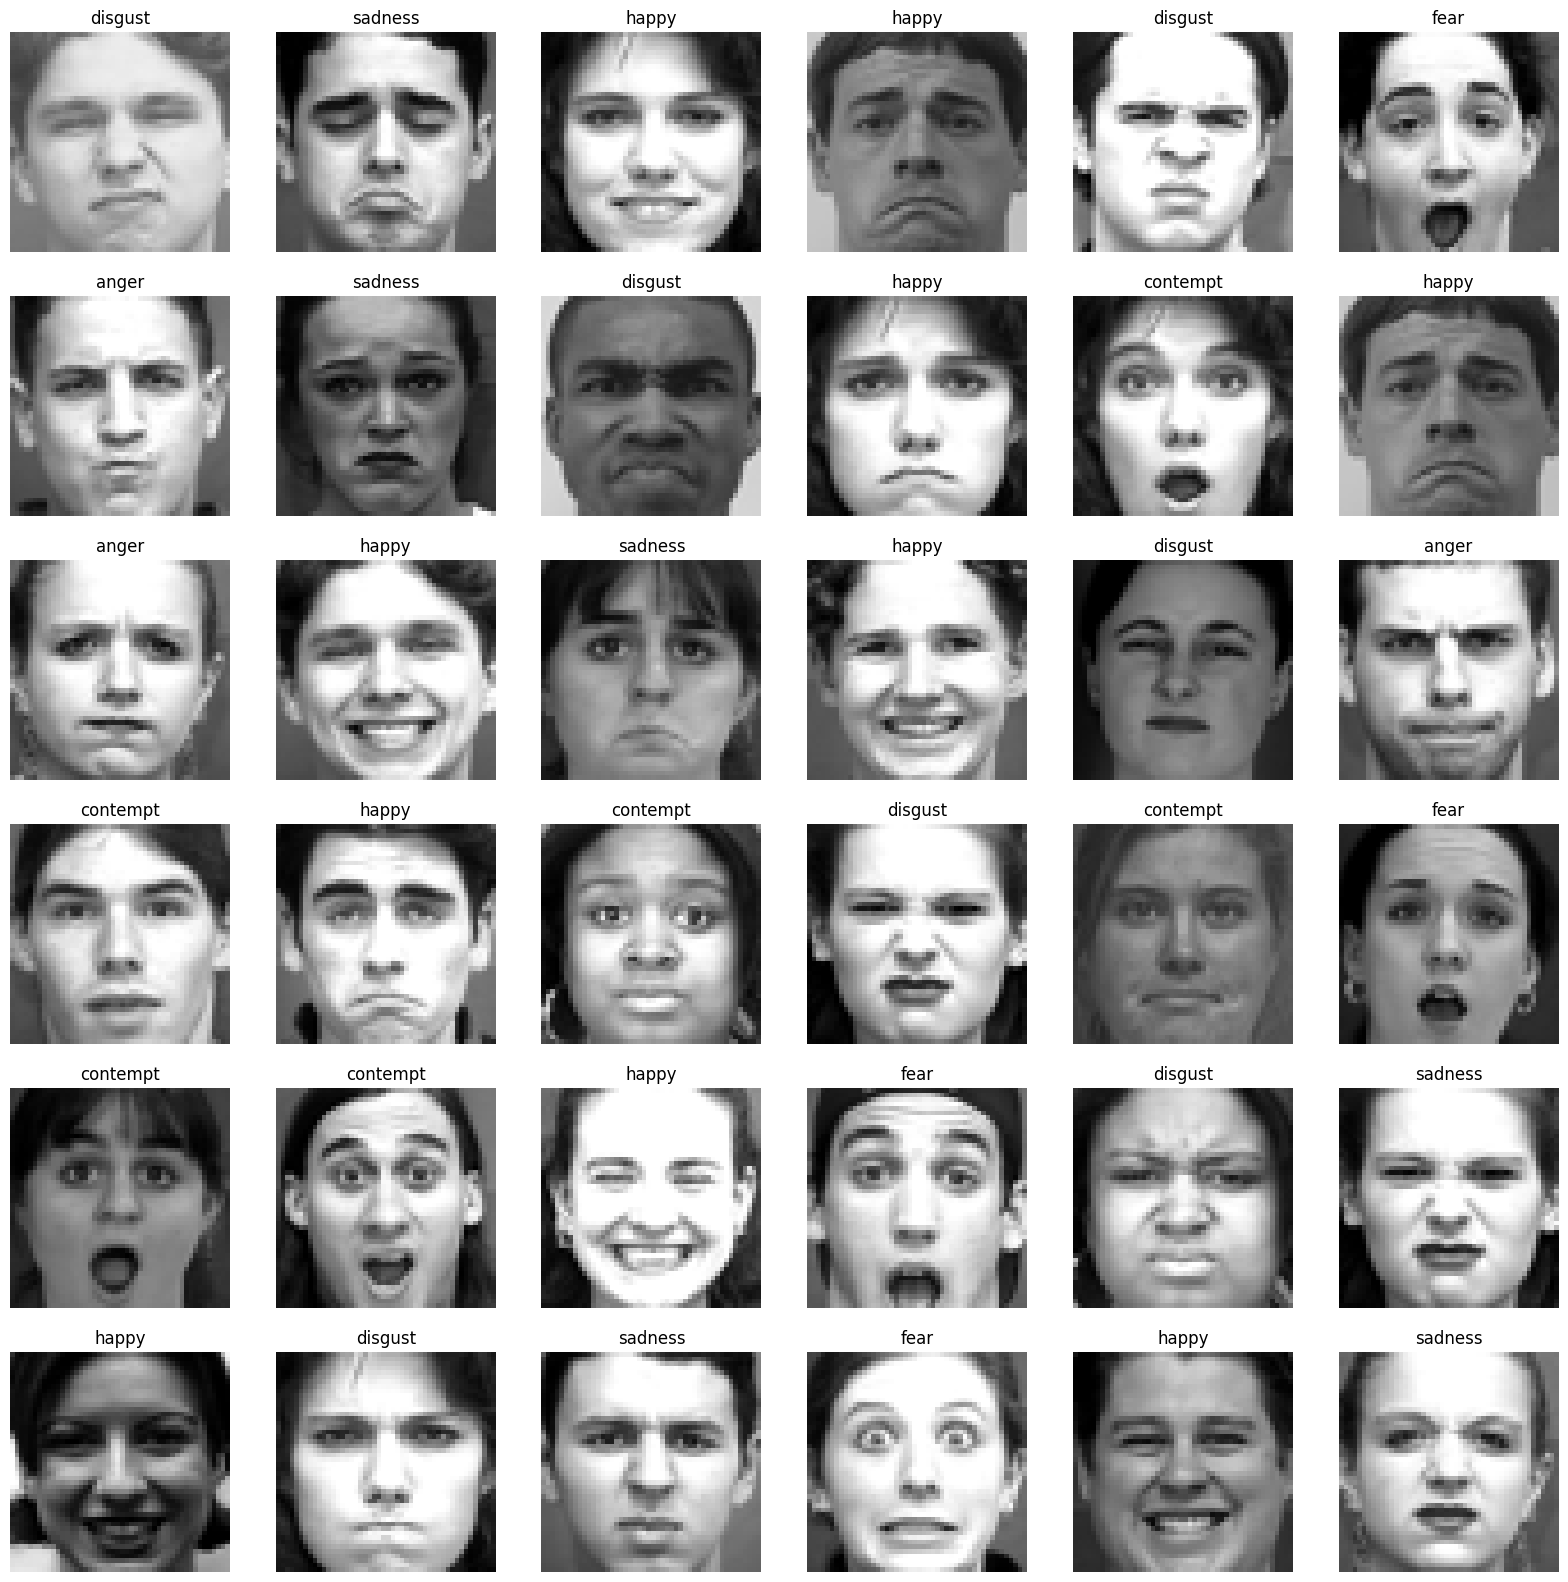

In [200]:
import matplotlib.pyplot as plt
plt.figure(figsize= (20,20))
for i,z in enumerate(list(np.random.randint(0,len(x_img),36))):
    plt.subplot(6,6,i+1)
    plt.imshow(x_img[z])
    plt.axis('off')
    plt.title(names[list(y_img[z].astype(int)).index(1)])

#CNN model

In [201]:
from keras.models import Sequential  # Correct import
from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers.convolutional import Conv2D, MaxPooling2D  # Correct import


In [202]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [203]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    input_shape = (48, 48, 3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

model = create_model()
model.summary()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 6)         456       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 24, 24, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 16)        2416      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 12, 12, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 64)        9280      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 6, 6, 64)         

In [204]:
history= model.fit(x_train,y_train,epochs=250, validation_data= (x_test,y_test))

Epoch 1/250
25/25 [==============================] - 3s 97ms/step - loss: 1.9117 - accuracy: 0.2602 - val_loss: 1.9235 - val_accuracy: 0.1929
Epoch 2/250
25/25 [==============================] - 2s 89ms/step - loss: 1.8354 - accuracy: 0.2666 - val_loss: 1.9152 - val_accuracy: 0.1929
Epoch 3/250
25/25 [==============================] - 2s 88ms/step - loss: 1.7614 - accuracy: 0.3125 - val_loss: 1.7385 - val_accuracy: 0.2589
Epoch 4/250
25/25 [==============================] - 3s 130ms/step - loss: 1.5229 - accuracy: 0.4694 - val_loss: 1.4918 - val_accuracy: 0.4518
Epoch 5/250
25/25 [==============================] - 4s 173ms/step - loss: 1.3128 - accuracy: 0.5395 - val_loss: 1.3336 - val_accuracy: 0.5076
Epoch 6/250
25/25 [==============================] - 2s 83ms/step - loss: 1.2053 - accuracy: 0.5612 - val_loss: 1.3096 - val_accuracy: 0.4975
Epoch 7/250
25/25 [==============================] - 2s 89ms/step - loss: 1.1469 - accuracy: 0.6008 - val_loss: 1.2284 - val_accuracy: 0.5330
Epoc

In [205]:
loss, score = model.evaluate(x_test,y_test,verbose=0)
score

0.5837563276290894

1/1 [==============================] - 0s 134ms/step


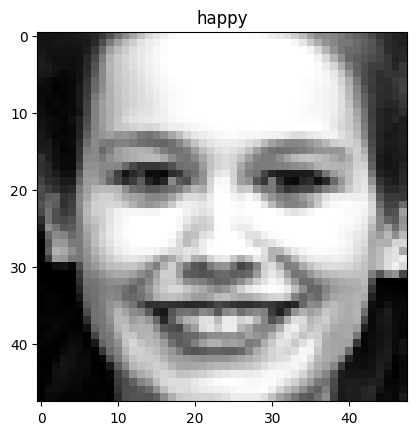

In [206]:
def prediction_samples(index):
    y_pred = model.predict(x_test[index:index+1])
    plt.imshow(x_test[index])

    # Check if the predicted class index is within the range of the class labels
    predicted_index = list(y_pred[0]).index(max(y_pred[0]))
    if predicted_index < len(names):
        plt.title(names[predicted_index])
    else:
        plt.title("Unknown")

prediction_samples(100)


<Figure size 640x480 with 0 Axes>

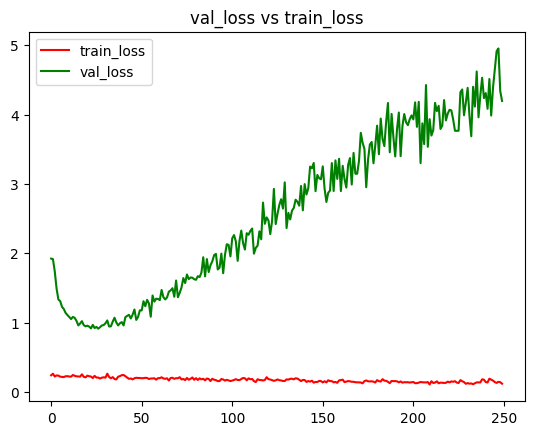

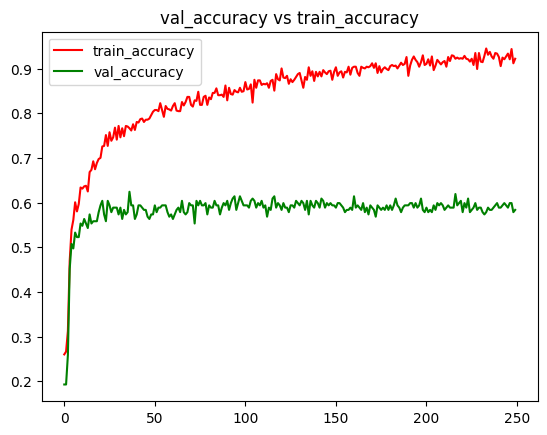

<Figure size 640x480 with 0 Axes>

In [207]:
train_accuracy = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

steps =  range(len(train_loss))

plt.plot(steps,train_loss,'r',label='train_loss')
plt.plot(steps,val_loss,'g',label='val_loss')
plt.title('val_loss vs train_loss')
plt.legend()
plt.figure()

plt.plot(steps,train_accuracy,'r',label='train_accuracy')
plt.plot(steps,val_accuracy,'g',label='val_accuracy')
plt.title('val_accuracy vs train_accuracy')
plt.legend()
plt.figure()